# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

/Users/mrudula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mrudula/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/Users/mrudula/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Data

In [2]:
# data loading
df = pd.read_csv('credit_score.csv')

print(df.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/2711765803.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


# Inspecting Data

In [3]:
df.shape
#100,000 rows and 28 columns

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
#checking for any duplcate rows
df.duplicated().sum()

0

In [6]:
df.nunique()
# number of unique values in every column

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [7]:
null_count = df['Customer_ID'].isnull().sum()
print("Number of nulls: ", null_count)

id_len = df['Customer_ID'].astype(str).str.len()
print(id_len.describe())

Number of nulls:  0
count    100000.000000
mean          9.939520
std           0.238375
min           9.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: Customer_ID, dtype: float64


In [8]:
# each customer ID seems to be of the form CUS_0x for hexademical followed by 3-4 alphanumeric characters for a total length of 9-10 characters
# checking to make sure all customer IDs match this pattern and there is no dummy values or typos

pattern = r'^CUS_0x[0-9a-f]{3,4}$'
invalid_id = df[~df['Customer_ID'].astype(str).str.match(pattern)]
print(len(invalid_id))

0


In [9]:
print(df['Name'].unique()[:10])
print(df['SSN'].unique()[:10])

['Aaron Maashoh' nan 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur']
['821-00-0265' '#F%$D@*&8' '004-07-5839' '486-85-3974' '072-31-6145'
 '615-06-7821' '612-70-8987' '411-51-0676' '500-92-6408' '070-19-1622']


In [10]:
columns_to_analyze = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
                      'Monthly_Balance', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount',
                      'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Score']

for column in columns_to_analyze:
        print(f"\nAnalyzing column: '{column}'")
        column_as_str = df[column].astype(str)

        alphabet = column_as_str.str.contains('[a-zA-Z]', na=False)
        val1 = df.loc[alphabet, column]
        print(f"Values containing alphabets:")
        print(val1.tolist())
        unique1 = val1.value_counts()
        print("\nUnique values containing alphabets and their counts:")
        print(unique1)

        special_char = column_as_str.str.contains('[^a-zA-Z0-9\s.]', na=False)
        special_char_values = df.loc[special_char, column]
        print(f"\nValues containing special characters:")
        print(special_char_values.tolist())
        unique_special = special_char_values.value_counts()
        print("\nUnique values containing special characters and their counts:")
        print(unique_special)


Analyzing column: 'Age'
Values containing alphabets:
[]

Unique values containing alphabets and their counts:
Series([], Name: count, dtype: int64)

Values containing special characters:
['-500', '28_', '34_', '30_', '24_', '33_', '35_', '-500', '30_', '31_', '40_', '37_', '54_', '21_', '37_', '-500', '37_', '33_', '-500', '20_', '30_', '43_', '38_', '18_', '-500', '18_', '2111_', '46_', '35_', '16_', '19_', '19_', '47_', '-500', '28_', '-500', '53_', '-500', '53_', '28_', '-500', '25_', '38_', '27_', '37_', '27_', '19_', '21_', '21_', '55_', '19_', '31_', '33_', '34_', '42_', '43_', '-500', '-500', '27_', '30_', '48_', '38_', '18_', '19_', '40_', '-500', '49_', '-500', '50_', '-500', '32_', '16_', '16_', '34_', '34_', '22_', '22_', '-500', '17_', '29_', '20_', '32_', '48_', '20_', '-500', '15_', '22_', '19_', '19_', '-500', '51_', '30_', '31_', '38_', '-500', '-500', '28_', '-500', '28_', '28_', '40_', '26_', '26_', '51_', '51_', '38_', '40_', '-500', '50_', '40_', '39_', '21_', '31_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Values containing special characters:
[]

Unique values containing special characters and their counts:
Series([], Name: count, dtype: int64)

Analyzing column: 'Payment_of_Min_Amount'
Values containing alphabets:
['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'NM', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'NM', 'No', 'No', 'No', 'No', 'No', 'Yes', 'NM', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'NM', 'No', 'No', 'No', 'No', 'No', 'No', 'NM', 'No', 'NM', 'No', 'No', 'No', 'No', 'No', 'NM', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'NM', 'Yes', 'No', 'NM', 'NM', 'No', 'No', 'NM', 'No', 'No', 'NM', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'NM', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'NM', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'NM', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'NM', 'Yes', 'Yes', 'Yes', 'Yes', 'NM', 'NM', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Ye

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Handling Anomalies and Typecasting Numerical Columns

In [11]:
# handling and replacing _ values and typecasting the numerical columns

columns_to_update = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
                      'Monthly_Balance']
for col in columns_to_update:
        df[col] = df[col].str.strip('_')
        df[col] = pd.to_numeric(df[col], errors='coerce')

        special_chars = df[col].astype(str).str.contains(r'[^a-zA-Z0-9\s.\-]|(?<!\d)-(?!\d)', na=False)
        if special_chars.any():
            print(f"Column '{col}' still contains special characters:")
            unique_special = special_chars.value_counts()
            print(unique_special)
        else:
            print(f"Column '{col}' is clean of special characters.")

Column 'Age' is clean of special characters.
Column 'Annual_Income' is clean of special characters.
Column 'Num_of_Loan' is clean of special characters.
Column 'Num_of_Delayed_Payment' is clean of special characters.
Column 'Changed_Credit_Limit' is clean of special characters.
Column 'Outstanding_Debt' is clean of special characters.
Column 'Amount_invested_monthly' is clean of special characters.
Column 'Monthly_Balance' still contains special characters:
Monthly_Balance
False    99991
True         9
Name: count, dtype: int64


In [12]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [13]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              2.868
Credit_Score                 0.000
dtype: float64


# Dropping Columns which are not required

In [14]:
# we can drop ID, SSN, and Name because they don't give us any particular information we don't have from the customer ID already and will not help with prediction
columns_to_drop = ['SSN', 'Name', 'ID']
df = df.drop(columns=columns_to_drop)

In [15]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.088580e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.208492e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.699858e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.364493e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.696405e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


# Analyzing Categorical Variables

In [16]:
categoricals = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 
                'Payment_Behaviour', 'Credit_Score']

for col in categoricals:
    print(df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt 

In [17]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

In [19]:
print(df['Month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


In [20]:
# check if customers are associated with the same set of months for further analysis since there are 8 unique months in the dataset from Jan - Aug but 12 months in a year
customer_months = df.groupby('Customer_ID')['Month'].apply(set)
first_customer_months = customer_months.iloc[0]
checker = (customer_months == first_customer_months).all()
print(checker)

True


In [21]:
# sort the data based on months grouped by customer ID
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df = df.sort_values('Month')

In [22]:
for column in df.columns:
        print(f"\nAnalyzing column: '{column}'")
        column_as_str = df[column].astype(str)

        special_char = column_as_str.str.contains('[^a-zA-Z0-9\s.]', na=False)
        special_char_values = df.loc[special_char, column]
        unique_special = special_char_values.value_counts()
        print("\nUnique values containing special characters and their counts:")
        print(unique_special)


Analyzing column: 'Customer_ID'

Unique values containing special characters and their counts:
Customer_ID
CUS_0xd40     8
CUS_0x67a9    8
CUS_0x9ae0    8
CUS_0x75ee    8
CUS_0x970f    8
             ..
CUS_0xa055    8
CUS_0x9438    8
CUS_0xb5da    8
CUS_0xb8c     8
CUS_0x9bd1    8
Name: count, Length: 12500, dtype: int64

Analyzing column: 'Month'

Unique values containing special characters and their counts:
Month
January     0
February    0
March       0
April       0
May         0
June        0
July        0
August      0
Name: count, dtype: int64

Analyzing column: 'Age'

Unique values containing special characters and their counts:
Age
-500    886
Name: count, dtype: int64

Analyzing column: 'Occupation'

Unique values containing special characters and their counts:
Occupation
_______          7062
Media_Manager    6232
Name: count, dtype: int64

Analyzing column: 'Annual_Income'

Unique values containing special characters and their counts:
Series([], Name: count, dtype: int64)

# Handling Anomalies and Null Values in Numerical Columns

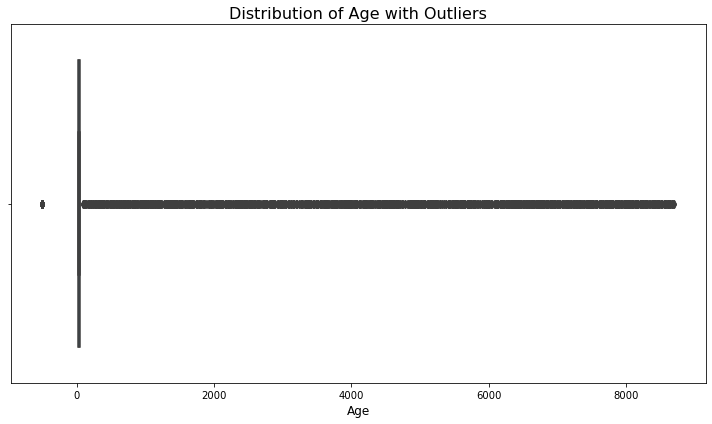

Age Statistics:
Median: 33.00
IQR: 18.00
Lower bound for outliers: -3.00
Upper bound for outliers: 69.00
Number of outliers: 2781


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

plt.title('Distribution of Age with Outliers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()
q1, q3 = df['Age'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Age Statistics:")
print(f"Median: {df['Age'].median():.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outliers: {((df['Age'] < lower_bound) | (df['Age'] > upper_bound)).sum()}")

In [24]:
ages_over_69 = (df['Age'] > 69).sum()
print(f"Number of ages greater: {ages_over_69}")

ages_over_100 = (df['Age'] > 100).sum()
print(f"Number of ages greater: {ages_over_100}")

ages_under = (df['Age'] < 0).sum()
print(f"Number of ages less than: {ages_under}")

Number of ages greater: 1895
Number of ages greater: 1890
Number of ages less than: 886


In [25]:
# There are 886 values of Age with -500 which is an invalid age.
# Based on the distribution of Age ages greater than 69 also seem to be errors/ invalid entries with many ages in thousands which is impossible
# Replacing them with valid values based on the Age data for this customer available from the previous and next months

import numpy as np

def fill_age(group):
    group['Age'] = group['Age'].where((group['Age'] > 0) & (group['Age'] < 69), np.nan)
    group['Age'] = group['Age'].ffill().bfill()
    return group

df = df.groupby('Customer_ID').apply(fill_age).reset_index(drop=True)

df['Age'] =  df['Age'].astype('Int64')
print(df['Age'].value_counts())

if ((df['Age'] <= 0) | (df['Age'] >= 69)).any():
    print("There are still some out-of-range values remaining.")
else:
    print("All out-of-range values have been replaced.")

Age
38    3077
28    3053
31    3041
26    3034
32    2969
36    2955
25    2945
35    2943
27    2942
39    2921
34    2918
44    2895
22    2881
19    2870
41    2863
20    2837
37    2828
29    2820
43    2819
30    2803
21    2796
24    2790
23    2724
45    2713
40    2693
42    2640
33    2625
18    2441
46    1661
15    1613
17    1553
16    1498
48    1425
49    1414
55    1396
53    1393
52    1389
54    1340
51    1328
50    1308
47    1261
14    1213
56     372
Name: count, dtype: Int64
All out-of-range values have been replaced.


/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/246827674.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID').apply(fill_age).reset_index(drop=True)


In [26]:
print(df['Age'].describe())
#fixed Age column with all valid data

count     100000.0
mean      33.30924
std      10.764996
min           14.0
25%           24.0
50%           33.0
75%           42.0
max           56.0
Name: Age, dtype: Float64


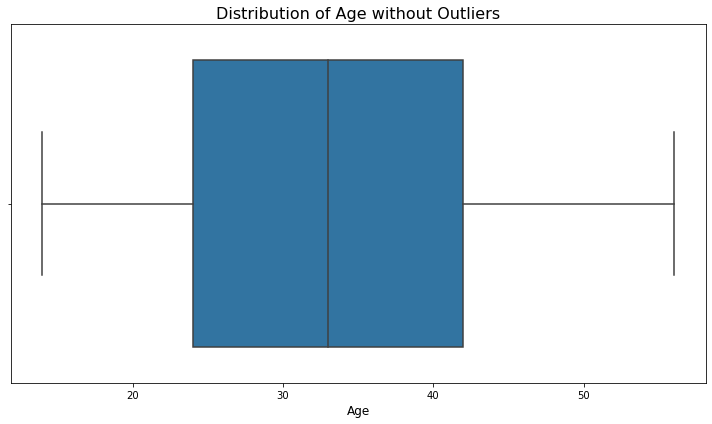

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

plt.title('Distribution of Age without Outliers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
df['Age'].isna().sum()

0

In [29]:
def check_age_consistency(group):
    age_diff = group['Age'].diff()
    is_consistent = ((age_diff == 0) | (age_diff == 1)).all()
    one_increase = (age_diff == 1).sum() <= 1
    return is_consistent and one_increase

consistency_check = df.groupby('Customer_ID').apply(check_age_consistency)
print(f"Number of customers with inconsistent ages: {(~consistency_check).sum()}")

# verified that all customers have valid ages in their rows i.e.
# the difference between different months for same customer should not be more than 1 because it is info from same year

Number of customers with inconsistent ages: 0


/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/2156675146.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consistency_check = df.groupby('Customer_ID').apply(check_age_consistency)


In [30]:
print(df['Num_Bank_Accounts'].describe())

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64


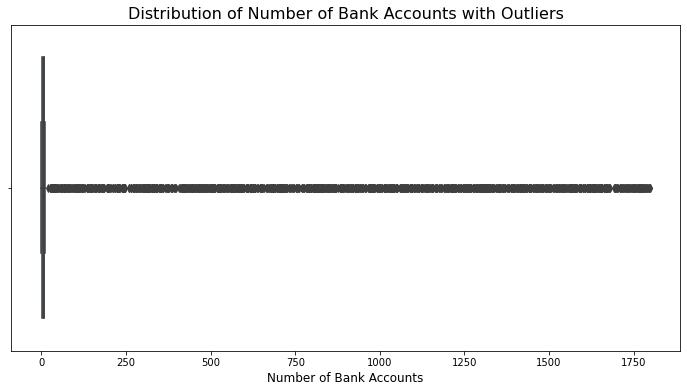

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Lower bound for outliers: -3.00
Upper bound for outliers: 13.00

Number of outliers: 1315


In [31]:
Q1 = df['Num_Bank_Accounts'].quantile(0.25)
Q3 = df['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_Bank_Accounts'])
plt.title('Distribution of Number of Bank Accounts with Outliers', fontsize=16)
plt.xlabel('Number of Bank Accounts', fontsize=12)
plt.show()

print(df['Num_Bank_Accounts'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Num_Bank_Accounts'] < lower_bound) | (df['Num_Bank_Accounts'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [32]:
print(f"Number of rows with bank accounts less than 0: {len(df[df['Num_Bank_Accounts'] < 0])}")
print(f"Number of outliers above upper bound: {len(df[df['Num_Bank_Accounts'] > upper_bound])}")

Number of rows with bank accounts less than 0: 21
Number of outliers above upper bound: 1315


In [33]:
# replacing all outlier number of bank accounts data based on the data of the same customer from previous / later months
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.where((x >= 0) & (x <= 13)).ffill().bfill())
print(df['Num_Bank_Accounts'].describe())

count    100000.000000
mean          5.368800
std           2.593279
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Bank_Accounts, dtype: float64


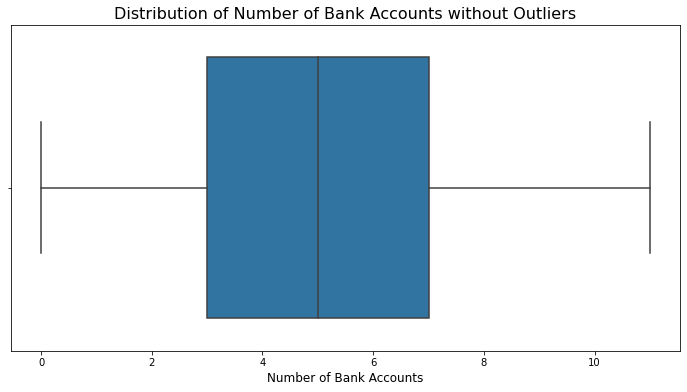

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_Bank_Accounts'])
plt.title('Distribution of Number of Bank Accounts without Outliers', fontsize=16)
plt.xlabel('Number of Bank Accounts', fontsize=12)
plt.show()

In [35]:
diffs = df.groupby('Customer_ID')['Num_Bank_Accounts'].diff().abs()
diff_counts = diffs.value_counts().sort_index()

print("Distribution of differences in Num_Bank_Accounts:")
print(diff_counts)
# verified that the number of bank accounts associated with a customer doesn't increase or decrease by more than 1 through the months
# num bank accounts now has all valid data

Distribution of differences in Num_Bank_Accounts:
Num_Bank_Accounts
0.0    87197
1.0      303
Name: count, dtype: int64


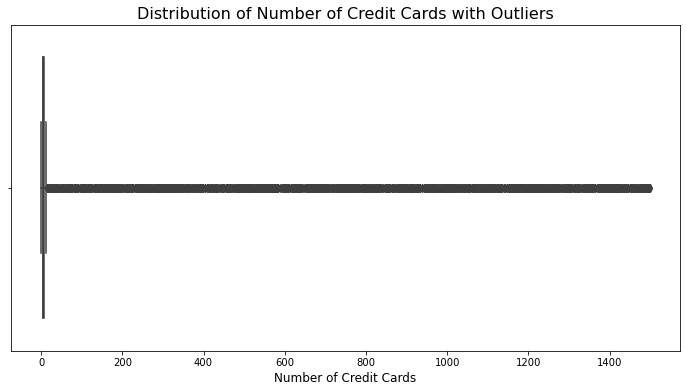

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Lower bound for outliers: -0.50
Upper bound for outliers: 11.50

Number of outliers: 2271


In [36]:
# checking credit cards column now
Q1 = df['Num_Credit_Card'].quantile(0.25)
Q3 = df['Num_Credit_Card'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_Credit_Card'])
plt.title('Distribution of Number of Credit Cards with Outliers', fontsize=16)
plt.xlabel('Number of Credit Cards', fontsize=12)
plt.show()

print(df['Num_Credit_Card'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Num_Credit_Card'] < lower_bound) | (df['Num_Credit_Card'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [37]:
print(f"Number of rows with credit cards less than 0: {len(df[df['Num_Credit_Card'] < 0])}")
print(f"Number of outliers above upper bound: {len(df[df['Num_Credit_Card'] > upper_bound])}")
print(f"Number of outliers above upper bound: {len(df[df['Num_Credit_Card'] > 12])}")
# number of credit cards can not be a decimal hence allowing values of upper bound up to 12 rounding up from 11.5

Number of rows with credit cards less than 0: 0
Number of outliers above upper bound: 2271
Number of outliers above upper bound: 2271


In [38]:
df['Num_Credit_Card'].isna().sum()

0

In [39]:
# replacing all outlier number of credit cards data based on the data of the same customer from previous / later months
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.where((x >= 0) & (x <= 12)).ffill().bfill())
print(df['Num_Credit_Card'].describe())

count    100000.000000
mean          5.533640
std           2.067073
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64


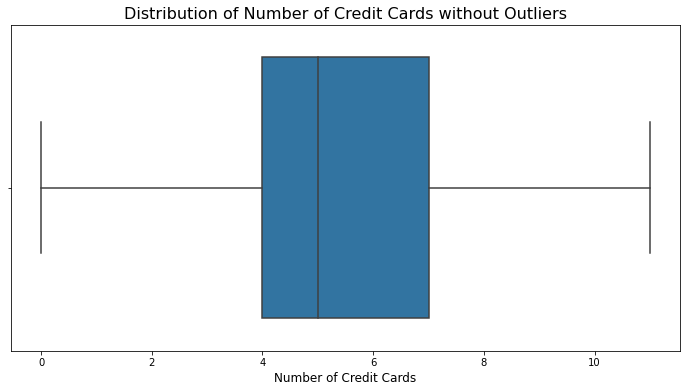

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_Credit_Card'])
plt.title('Distribution of Number of Credit Cards without Outliers', fontsize=16)
plt.xlabel('Number of Credit Cards', fontsize=12)
plt.show()

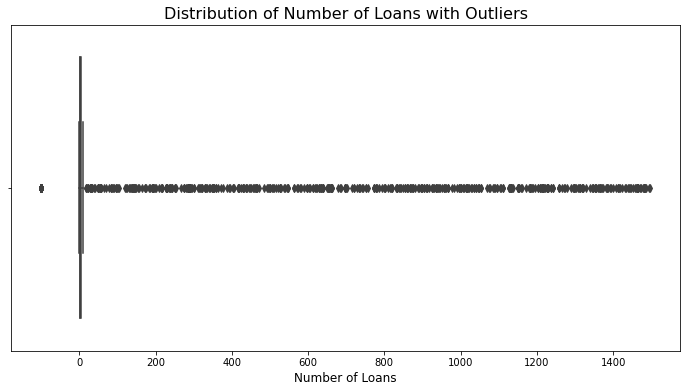

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

Lower bound for outliers: -5.00
Upper bound for outliers: 11.00

Number of outliers: 4348


In [41]:
# checking No. of Loans column now
Q1 = df['Num_of_Loan'].quantile(0.25)
Q3 = df['Num_of_Loan'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_of_Loan'])
plt.title('Distribution of Number of Loans with Outliers', fontsize=16)
plt.xlabel('Number of Loans', fontsize=12)
plt.show()

print(df['Num_of_Loan'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Num_of_Loan'] < lower_bound) | (df['Num_of_Loan'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [42]:
print(f"Number of rows with number of loans less than 0: {len(df[df['Num_of_Loan'] < 0])}")
print(f"Number of outliers above upper bound: {len(df[df['Num_of_Loan'] > upper_bound])}")

Number of rows with number of loans less than 0: 3876
Number of outliers above upper bound: 472


In [43]:
df['Num_of_Loan'].isna().sum()

0

In [44]:
# replacing all outlier number of loans data based on the data of the same customer from previous / later months
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.where((x >= 0) & (x <= upper_bound)).ffill().bfill())
print(df['Num_of_Loan'].describe())

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64


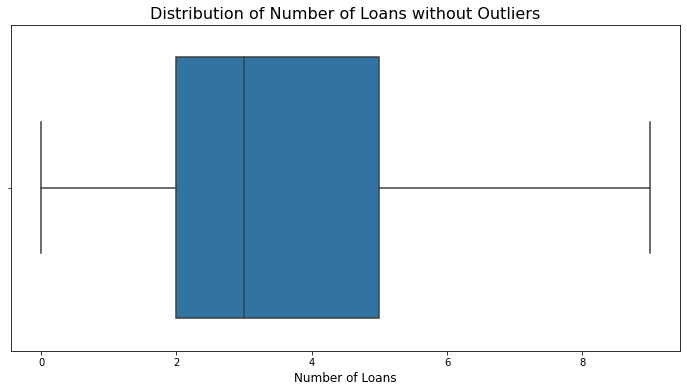

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_of_Loan'])
plt.title('Distribution of Number of Loans without Outliers', fontsize=16)
plt.xlabel('Number of Loans', fontsize=12)
plt.show()

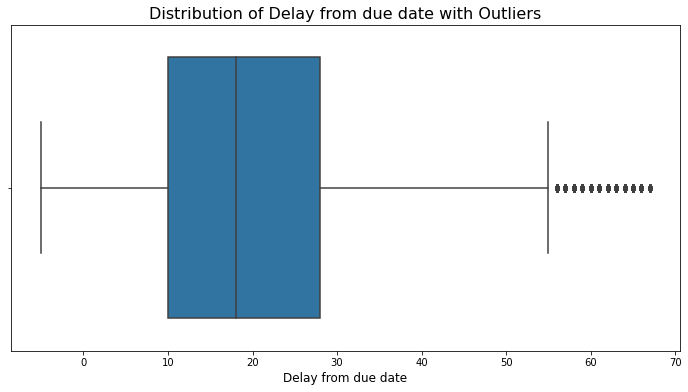

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

Lower bound for outliers: -17.00
Upper bound for outliers: 55.00

Number of outliers: 4002


In [46]:
# checking Delay from Due Date column now
Q1 = df['Delay_from_due_date'].quantile(0.25)
Q3 = df['Delay_from_due_date'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Delay_from_due_date'])
plt.title('Distribution of Delay from due date with Outliers', fontsize=16)
plt.xlabel('Delay from due date', fontsize=12)
plt.show()

print(df['Delay_from_due_date'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Delay_from_due_date'] < lower_bound) | (df['Delay_from_due_date'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [47]:
print(f"Number of rows with Delay from due date less than 0: {len(df[df['Delay_from_due_date'] < 0])}")

Number of rows with Delay from due date less than 0: 591


In [48]:
df['Delay_from_due_date'].isna().sum()

0

In [49]:
# replacing all outlier Delay from due date data based on the data of the same customer from previous / later months
df['Delay_from_due_date'] = df.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x: x.where((x >= 0)).ffill().bfill())
print(df['Delay_from_due_date'].describe())

count    100000.000000
mean         21.092520
std          14.826343
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


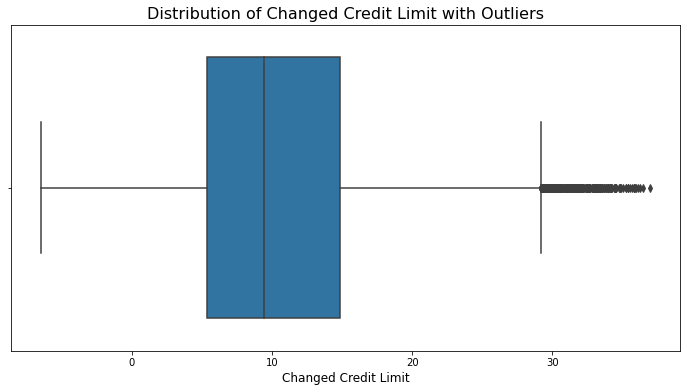

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

Lower bound for outliers: -9.00
Upper bound for outliers: 29.20

Number of outliers: 668


In [50]:
# checking Changed Credit Limit column now
Q1 = df['Changed_Credit_Limit'].quantile(0.25)
Q3 = df['Changed_Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Changed_Credit_Limit'])
plt.title('Distribution of Changed Credit Limit with Outliers', fontsize=16)
plt.xlabel('Changed Credit Limit', fontsize=12)
plt.show()

print(df['Changed_Credit_Limit'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Changed_Credit_Limit'] < lower_bound) | (df['Changed_Credit_Limit'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [51]:
print(f"Number of rows with Delay from due date less than 0: {len(df[df['Changed_Credit_Limit'] < 0])}")

Number of rows with Delay from due date less than 0: 1586


In [52]:
df['Changed_Credit_Limit'].isna().sum()

2091

In [53]:
# replacing all outlier Delay from due date data based on the data of the same customer from previous / later months
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.where((x >= 0), np.nan).ffill().bfill())
print(df['Changed_Credit_Limit'].describe())

count    100000.000000
mean         10.478953
std           6.658626
min           0.000000
25%           5.380000
50%           9.410000
75%          14.860000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64


In [54]:
df['Changed_Credit_Limit'].isna().sum()

0

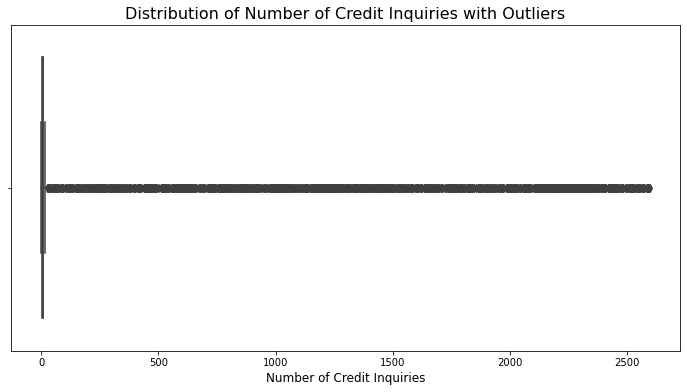

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

Lower bound for outliers: -6.00
Upper bound for outliers: 18.00

Number of outliers: 1650


In [55]:
# checking Number of Credit Inquiries column now
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_Credit_Inquiries'])
plt.title('Distribution of Number of Credit Inquiries with Outliers', fontsize=16)
plt.xlabel('Number of Credit Inquiries', fontsize=12)
plt.show()

print(df['Num_Credit_Inquiries'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [56]:
print(f"Number of outliers above upper bound: {len(df[df['Num_Credit_Inquiries'] > upper_bound])}")

Number of outliers above upper bound: 1650


In [57]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [58]:
# replacing all outlier Number of Credit Inquiries data based on the data of the same customer from previous / later months
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.where((x <= upper_bound), np.nan).ffill().bfill())
print(df['Num_Credit_Inquiries'].describe())

count    100000.000000
mean          5.772820
std           3.861137
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64


In [59]:
df['Num_Credit_Inquiries'].isna().sum()

0

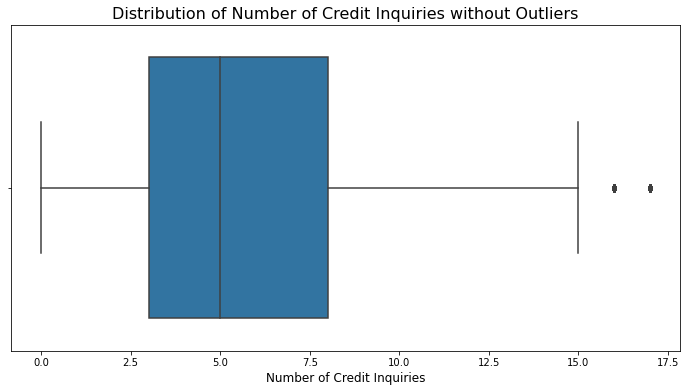

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_Credit_Inquiries'])
plt.title('Distribution of Number of Credit Inquiries without Outliers', fontsize=16)
plt.xlabel('Number of Credit Inquiries', fontsize=12)
plt.show()

In [61]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.0,1.000000e+05,84998.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,92998.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,33.30924,1.764157e+05,4194.170850,5.368800,5.533640,72.466040,3.532880,21.092520,30.923342,10.478953,5.772820,1426.220376,32.285173,1403.118217,637.412998,-3.088580e+22
std,10.764996,1.429618e+06,3183.686167,2.593279,2.067073,466.422621,2.446356,14.826343,226.031892,6.658626,3.861137,1155.129026,5.116875,8306.041270,2043.319327,3.208492e+24
min,14.0,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.0,1.945750e+04,1625.568229,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.380000,3.000000,566.072500,28.052567,30.306660,74.534002,2.699858e+02
50%,33.0,3.757861e+04,3093.745000,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,5.000000,1166.155000,32.305784,69.249473,135.925682,3.364493e+02
75%,42.0,7.279092e+04,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.860000,8.000000,1945.962500,36.496663,161.224249,265.731733,4.696405e+02
max,56.0,2.419806e+07,15204.633333,11.000000,11.000000,5797.000000,9.000000,67.000000,4397.000000,36.970000,17.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [62]:
# Checking column Payment Behaviour for anomalies
df['Monthly_Inhand_Salary'].isna().sum()

15002

In [63]:
# replacing all outlier Number of Credit Inquiries data based on the data of the same customer from previous / later months
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].ffill().bfill())
print(df['Monthly_Inhand_Salary'].describe())

/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/78293298.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].ffill().bfill())


count    100000.000000
mean       4198.771619
std        3187.494355
min         303.645417
25%        1626.761667
50%        3096.378333
75%        5961.745000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


In [64]:
df['Monthly_Inhand_Salary'].isna().sum()

0

In [65]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x1000,January,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.94109,244.750283,Low_spent_Large_value_payments,252.924793,Standard
1,CUS_0x1000,February,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,29.439759,10 Years and 3 Months,Yes,42.94109,176.132567,High_spent_Small_value_payments,311.542510,Poor
2,CUS_0x1000,March,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,38.285928,10 Years and 4 Months,Yes,42.94109,109.056519,High_spent_Medium_value_payments,368.618557,Poor
3,CUS_0x1000,April,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,32.843081,10 Years and 5 Months,Yes,42.94109,87.909909,!@9#%8,419.765167,Poor
4,CUS_0x1000,May,17,Lawyer,30625.94,2706.161667,6.0,5.0,27,2.0,...,Bad,1562.91,32.330508,10 Years and 6 Months,Yes,42.94109,191.834767,Low_spent_Large_value_payments,305.840309,Poor


In [66]:
# Checking column Amount invested monthly for anomalies
df['Amount_invested_monthly'].isna().sum()

4479

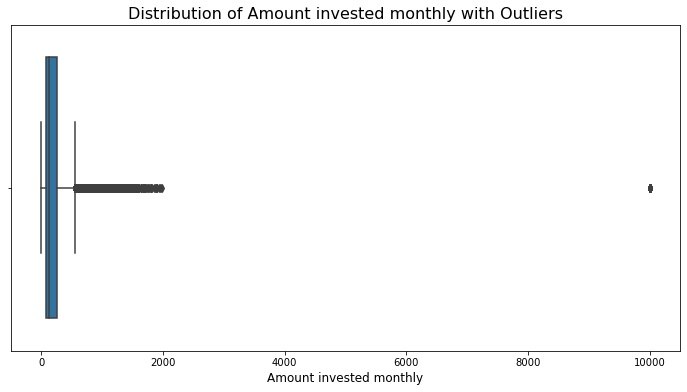

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

Lower bound for outliers: -212.26
Upper bound for outliers: 552.53

Number of outliers: 10096


In [67]:
Q1 = df['Amount_invested_monthly'].quantile(0.25)
Q3 = df['Amount_invested_monthly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Amount_invested_monthly'])
plt.title('Distribution of Amount invested monthly with Outliers', fontsize=16)
plt.xlabel('Amount invested monthly', fontsize=12)
plt.show()
print(df['Amount_invested_monthly'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Amount_invested_monthly'] < lower_bound) | (df['Amount_invested_monthly'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [68]:
# the 10000 value is used as a placeholder in the Amount invested monthly column. Replacing this value with a value before or after the given value when grouped by customer
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.replace(10000, pd.NA).ffill().bfill())
print(df['Amount_invested_monthly'].describe())

#fixed Amount invested monthly column with all valid data

/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/2827347126.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.replace(10000, pd.NA).ffill().bfill())


count    100000.000000
mean        195.833575
std         199.920336
min           0.000000
25%          72.297119
50%         128.975431
75%         237.124373
max        1977.326102
Name: Amount_invested_monthly, dtype: float64


In [69]:
# Replacing all NAN values in column Credit History Age with 0
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].fillna(0)

/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/2445473917.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].fillna(0)


In [70]:
# Converting the column Credit History Age from a string including number of years and months to a numerical value specifying the total number of years
temp = []
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)

for value in df['Credit_History_Age']:
    if value != '0':
        lst = value.split()
        temp.append(int(lst[0]) + (int(lst[3]) / 12))
    else:
        temp.append(int(value))
    
df.loc[:, 'Credit_History_Age'] = temp

In [71]:
df['Credit_History_Age']

0        10.166667
1            10.25
2        10.333333
3        10.416667
4             10.5
           ...    
99995    18.416667
99996         18.5
99997    18.583333
99998    18.666667
99999        18.75
Name: Credit_History_Age, Length: 100000, dtype: object

In [72]:
#Converting the column to type float
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)
print(df['Credit_History_Age'])

0        10.166667
1        10.250000
2        10.333333
3        10.416667
4        10.500000
           ...    
99995    18.416667
99996    18.500000
99997    18.583333
99998    18.666667
99999    18.750000
Name: Credit_History_Age, Length: 100000, dtype: float64


In [73]:
print(len(df[df['Credit_History_Age'] == 0]))

9030


In [74]:
# Replacing the 0 values with values of Credit History Age Incremented by 1 than the previous

temp = []
num = 0

for value in df['Credit_History_Age']:
    if value == 0:
        temp.append(num + (1 / 12))
    else:
        temp.append(value)
        num = value
    
df.loc[:, 'Credit_History_Age'] = temp

In [75]:
print(df['Credit_History_Age'])

0        10.166667
1        10.250000
2        10.333333
3        10.416667
4        10.500000
           ...    
99995    18.416667
99996    18.500000
99997    18.583333
99998    18.666667
99999    18.750000
Name: Credit_History_Age, Length: 100000, dtype: float64


In [76]:
print(len(df[df['Credit_History_Age'] == 0]))

0


In [77]:
#Checking for Null values in Monthly Balance column
df['Monthly_Balance'].isna().sum()

2868

In [78]:
df['Monthly_Balance'].describe()

count    9.713200e+04
mean    -3.088580e+22
std      3.208492e+24
min     -3.333333e+26
25%      2.699858e+02
50%      3.364493e+02
75%      4.696405e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

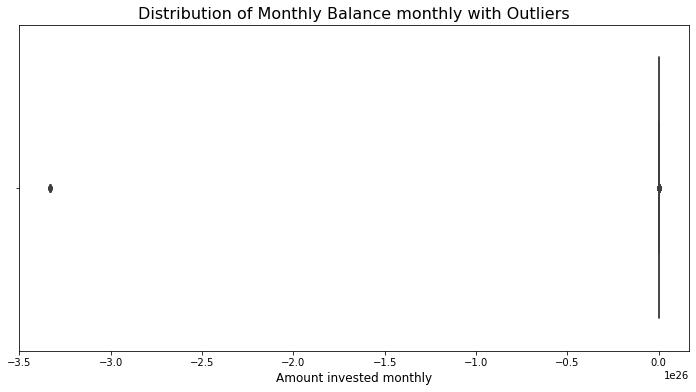

count    9.713200e+04
mean    -3.088580e+22
std      3.208492e+24
min     -3.333333e+26
25%      2.699858e+02
50%      3.364493e+02
75%      4.696405e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

Lower bound for outliers: -29.50
Upper bound for outliers: 769.12

Number of outliers: 7517


In [79]:
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Monthly_Balance'])
plt.title('Distribution of Monthly Balance monthly with Outliers', fontsize=16)
plt.xlabel('Amount invested monthly', fontsize=12)
plt.show()
print(df['Monthly_Balance'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Monthly_Balance'] < lower_bound) | (df['Monthly_Balance'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

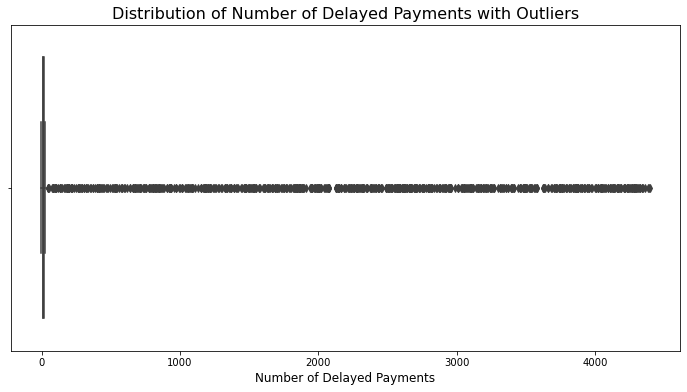

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

Lower bound for outliers: -4.50
Upper bound for outliers: 31.50

Number of outliers: 736


In [80]:
# checking Number of Delayed Payments column now
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_of_Delayed_Payment'])
plt.title('Distribution of Number of Delayed Payments with Outliers', fontsize=16)
plt.xlabel('Number of Delayed Payments', fontsize=12)
plt.show()

print(df['Num_of_Delayed_Payment'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Num_of_Delayed_Payment'] < lower_bound) | (df['Num_of_Delayed_Payment'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [81]:
print(f"Number of rows with number of delayed payments less than 0: {len(df[df['Num_of_Delayed_Payment'] < 0])}")
print(f"Number of outliers above upper bound: {len(df[df['Num_of_Delayed_Payment'] > upper_bound])}")

Number of rows with number of delayed payments less than 0: 644
Number of outliers above upper bound: 736


In [82]:
df['Num_of_Delayed_Payment'].isna().sum()

7002

In [83]:
# replacing all outlier Number of Delayed Payments data based on the data of the same customer from previous / later months
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.where((x >= 0) & (x <= upper_bound), pd.NA).ffill().bfill())
print(df['Num_of_Delayed_Payment'].describe())

count    100000.000000
mean         13.334050
std           6.271409
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          28.000000
Name: Num_of_Delayed_Payment, dtype: float64


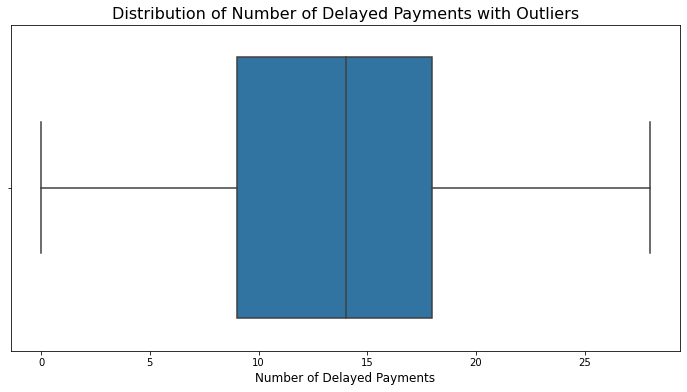

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Num_of_Delayed_Payment'])
plt.title('Distribution of Number of Delayed Payments with Outliers', fontsize=16)
plt.xlabel('Number of Delayed Payments', fontsize=12)
plt.show()

In [85]:
df['Num_of_Delayed_Payment'].isna().sum()

0

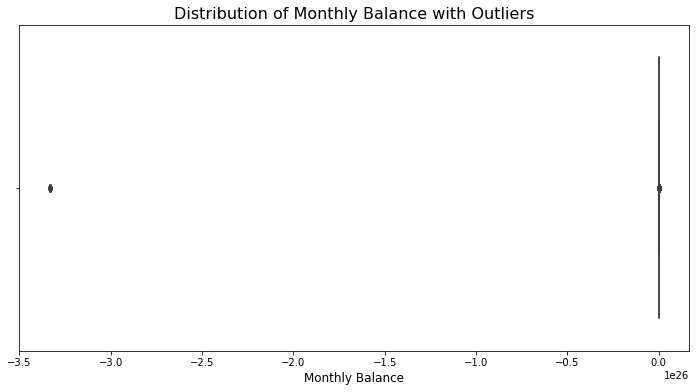

count    9.713200e+04
mean    -3.088580e+22
std      3.208492e+24
min     -3.333333e+26
25%      2.699858e+02
50%      3.364493e+02
75%      4.696405e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

Lower bound for outliers: -29.50
Upper bound for outliers: 769.12

Number of outliers: 7517


In [86]:
# checking Monthly Balance Payments column now
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Monthly_Balance'])
plt.title('Distribution of Monthly Balance with Outliers', fontsize=16)
plt.xlabel('Monthly Balance', fontsize=12)
plt.show()

print(df['Monthly_Balance'].describe())
print(f"\nLower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

outliers = df[(df['Monthly_Balance'] < lower_bound) | (df['Monthly_Balance'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

In [87]:
print(f"Number of rows with number of delayed payments less than 0: {len(df[df['Monthly_Balance'] < 0])}")

Number of rows with number of delayed payments less than 0: 9


In [88]:
# replacing all outlier Number of Delayed Payments data based on the data of the same customer from previous / later months
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.where(x >= 0).ffill().bfill())
print(df['Monthly_Balance'].describe())

count    98304.000000
mean       402.676334
std        214.539832
min          0.007760
25%        269.883765
50%        336.762318
75%        470.983772
max       1602.040519
Name: Monthly_Balance, dtype: float64


In [89]:
df['Monthly_Balance'].isna().sum()

1696

In [90]:
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

In [91]:
df['Monthly_Balance'].isna().sum()

0

In [92]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        395.846943
std         218.975178
min           0.000000
25%         266.732614
50%         334.065569
75%         467.378940
max        1602.040519
Name: Monthly_Balance, dtype: float64

# Handling Anomalies and Null Values in Categorical Variables 

In [93]:
# there are 7062 "_______" placeholder values in occupation replacing it with same customer's occupation from other months where available
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.replace('_______', pd.NA).ffill().bfill())
print(df['Occupation'].value_counts())

#fixed Occupation column with all valid data

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


In [94]:
df['Occupation'].isna().sum()

0

In [95]:
categoricals = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 
                'Payment_Behaviour', 'Credit_Score']

for col in categoricals:
    print(df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
Type_of_Loan
Not Specified                                                                              1408
Credit-Builder Loan                                                                        1280
Personal Loan                                                                              1272
Debt Consolidation Loan                                                                    1264
Student Loan                                                

In [96]:
# Checking column Payment Behaviour for anomalies
df['Payment_Behaviour'].isna().sum()

0

In [97]:
# there are 7600 "!@9#%8" placeholder values in Payment Behaviour Column. Replacing it with same customer's Payment Behaviour from other months where available
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.replace('!@9#%8', pd.NA).ffill().bfill())
print(df['Payment_Behaviour'].value_counts())

#fixed Payment Behaviour column with all valid data

Payment_Behaviour
Low_spent_Small_value_payments      27588
High_spent_Medium_value_payments    19015
Low_spent_Medium_value_payments     15012
High_spent_Large_value_payments     14839
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Name: count, dtype: int64


In [98]:
# Checking column Credit Mix for anomalies
df['Credit_Mix'].isna().sum()

0

In [99]:
# there are 20195 "_" placeholder values in Credit Mix Column. Replacing it with same customer's Credit Mix from other months where available
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.replace('_', pd.NA).ffill().bfill())
print(df['Credit_Mix'].value_counts())

#fixed Credit Mix column with all valid data

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64


In [100]:
# Checking column Type of Loan for anomalies
df['Type_of_Loan'].isna().sum()

11408

In [101]:
# replacing all null values in column Type of Loan data as 'Not Specified' category
df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].fillna('Not Specified')
print(df['Type_of_Loan'].value_counts())

#fixed Type of Loan column with all valid data

/var/folders/8w/f1nm4bk161nf0bdc91693vr40000gn/T/ipykernel_67838/1219164717.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].fillna('Not Specified')


Type_of_Loan
Not Specified                                                                              12816
Credit-Builder Loan                                                                         1280
Personal Loan                                                                               1272
Debt Consolidation Loan                                                                     1264
Student Loan                                                                                1240
                                                                                           ...  
Home Equity Loan, Payday Loan, Credit-Builder Loan, Not Specified, and Home Equity Loan        8
Personal Loan, Student Loan, Personal Loan, and Home Equity Loan                               8
Home Equity Loan, Payday Loan, Not Specified, and Home Equity Loan                             8
Home Equity Loan, Mortgage Loan, and Payday Loan                                               8
Auto Loan, Payday

In [102]:
df['Type_of_Loan'].isna().sum()

0

# Analysis of Relationships between Variables

In [103]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               100000 non-null  object  
 1   Month                     100000 non-null  category
 2   Age                       100000 non-null  Int64   
 3   Occupation                100000 non-null  object  
 4   Annual_Income             100000 non-null  float64 
 5   Monthly_Inhand_Salary     100000 non-null  float64 
 6   Num_Bank_Accounts         100000 non-null  float64 
 7   Num_Credit_Card           100000 non-null  float64 
 8   Interest_Rate             100000 non-null  int64   
 9   Num_of_Loan               100000 non-null  float64 
 10  Type_of_Loan              100000 non-null  object  
 11  Delay_from_due_date       100000 non-null  float64 
 12  Num_of_Delayed_Payment    100000 non-null  float64 
 13  Changed_Credit_Limit      1000

In [105]:
var = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
       'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 
      'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

my_corr_matrix = df[var].corr()

my_corr_matrix

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Annual_Income,1.000000,0.030508,-0.009142,-0.001958,-0.002908,-0.005428,-0.010644,0.001102,-0.010104,-0.003706,0.010316,-0.000178,-0.000248,0.019219,0.018617
Monthly_Inhand_Salary,0.030508,1.000000,-0.283253,-0.216944,-0.005668,-0.254406,-0.249315,-0.176100,-0.280429,-0.269078,0.176081,0.267424,0.007949,0.621230,0.673857
Num_Bank_Accounts,-0.009142,-0.283253,1.000000,0.442682,0.009920,0.472483,0.559775,0.333262,0.519331,0.507045,-0.071778,-0.478413,-0.006357,-0.180046,-0.287564
Num_Credit_Card,-0.001958,-0.216944,0.442682,1.000000,0.009095,0.417965,0.479546,0.255536,0.460208,0.490362,-0.055248,-0.411037,-0.006730,-0.142413,-0.231064
Interest_Rate,-0.002908,-0.005668,0.009920,0.009095,1.000000,0.007900,0.009790,0.000817,0.009830,0.010721,-0.000359,-0.009959,0.002517,-0.002664,-0.008441
Num_of_Loan,-0.005428,-0.254406,0.472483,0.417965,0.007900,1.000000,0.501292,0.374629,0.566149,0.638713,-0.100469,-0.597690,-0.001266,-0.163763,-0.414260
Delay_from_due_date,-0.010644,-0.249315,0.559775,0.479546,0.009790,0.501292,1.000000,0.296194,0.540764,0.571963,-0.063856,-0.485096,-0.003914,-0.160383,-0.271284
Changed_Credit_Limit,0.001102,-0.176100,0.333262,0.255536,0.000817,0.374629,0.296194,1.000000,0.382786,0.464063,-0.047901,-0.423679,-0.002432,-0.113453,-0.200006
Num_Credit_Inquiries,-0.010104,-0.280429,0.519331,0.460208,0.009830,0.566149,0.540764,0.382786,1.000000,0.598014,-0.077280,-0.603256,-0.004653,-0.175012,-0.307976
Outstanding_Debt,-0.003706,-0.269078,0.507045,0.490362,0.010721,0.638713,0.571963,0.464063,0.598014,1.000000,-0.071165,-0.620885,-0.004856,-0.171584,-0.304507


<AxesSubplot:>

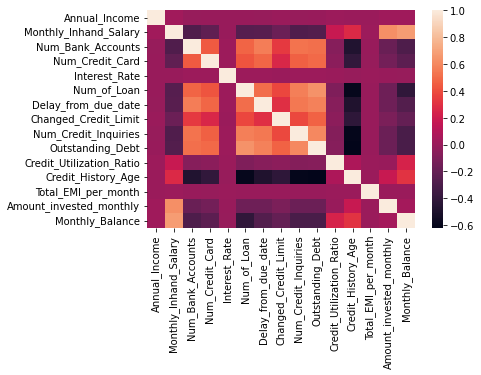

In [106]:
sns.heatmap(my_corr_matrix )

In [107]:
df.to_csv('cleaned_data.csv', index=False)